## Introduction:

This is the first of a series of notebooks whose goal is to interactively show you some techniques to visualize and analyze behavioral and neural data.

We assume some familiarity with Python, but we try to have a progressive complexity so that you can learn as you go.  If you're already familiar with certain things then you can move faster to more complicated parts.

Jupyter notebooks are composed of cells that can contain text (such as the one you're reading) or code that can be modified and executed interactively.  In order to run a cell you can press `Ctrl + Enter` or `Shift + Enter` if you also want to move to the successive cell. 

Some parts of the notebook are left empty and you'll have to code them for yourself, they will be highlighted with a keyboard symbol ⌨️.  In case you're really stuck, know that the full notebook is also available in the same Github repository.  But please try your best before looking at the corrections, the goal is not to reproduce the correction but to learn how to analyze data by yourself, there isn't just one right way to do it!

In this notebook we'll learn how to work with data and how to visualize it, we'll familiarize with the datasets that will be used in the following days for more advanced analysis.

## Importing the data:

We're running our notebook on Colab, which means that our code is running on Google's cloud servers.  Because of this we need to download the data we want to work on in our workspace.

With the following cell we can download some files containing helpful functions from Github:

In [1]:
#!mkdir /content/Helper_Functions/
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/accessing_data.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/hmm_plotters.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/OrthoViewer.py
#!wget -P /content/Helper_Functions/ https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/Helper_Functions/plotting_functions.py

While the following cell downloads a dataset from Drive:

In [2]:
#!gdown 1KqhXO6lepzwkH7A4Ii02UK1E9okW0mbl

We have just downloaded the file `fish1_different_speeds.hdf5` to the folder `\content`.  HDF5 is a format for storing hierarchically data and corrsponding metadata. In order to access it we can use the library `h5py`.  Try to import it and open the file.  If you need some information about the library you can have a look at https://docs.h5py.org/en/stable/quick.html#core-concepts

In [3]:
#⌨️⬇️
import h5py
file=h5py.File('content/fish1_different_speeds.hdf5','r')

Now that we opened the file we can visualize what's inside thanks to the function `h5tree_view`:

In [4]:
from Helper_Functions.accessing_data import h5tree_view

You can run `h5tree_view?` to get the documentation for this function and understand what it does and what are its inputs:

In [5]:
#⌨️⬇️
h5tree_view?

Signature: h5tree_view(file)
Docstring:
Display HDF5 file structure in tree-like format.

Parameters
----------
    :file: h5py.File , opened HDF5 file.
File:      ~/Science/IBIO-Banyuls2023-Python/Helper_Functions/accessing_data.py
Type:      function


In [6]:
#⌨️⬇️
h5tree_view(file)

. content/fish1_different_speeds.hdf5
├── 📁brain
│   ├── 🔢coordinates ⚙️(3, 30971)float64
│   ├── 🔢dff ⚙️(30971, 481)float64
│   ├── 🔢times ⚙️(481,)float64
├── 📁stimulus
│   ├── 🔢T ⚙️(481,)float64
│   ├── 🔢direction ⚙️(14362,)float64
│   ├── 🔢speed ⚙️(14362,)float64
│   ├── 🔢times ⚙️(14362,)float64
├── 📁tail
│   ├── 🔢coordinates ⚙️(36107, 11, 2)float64
│   ├── 🔢deflection ⚙️(36107,)float64
│   ├── 🔢forward_thrust ⚙️(36107,)float64
│   ├── 🔢side_thrust ⚙️(36107,)float64
│   ├── 🔢times ⚙️(36107,)float64


As you can see this file contains various arrays (collection of values), organized in different groups.

## Whole-brain imaging:

Now it's probably a good time to explain the experiment from which this data was recorded.

We measured the activity of most neurons in a the brain of a fish larva using a tecnhique called light-sheet microscopy
The fish was genetically modified so that its neurons expessed a calcium sensor, a molecule whose fluorescence is enhanced when it binds calcium ions.
Then we can measure the fluorescence of each neuron as an indicator of its activity: it's a measure of its concentration of calcium ions, which in turn is correlated with its firing rate.

In order to use this technique the fish is immobilized with an agarose gel, but in this particular case the tail is free and we recorded its movements as well.  Moreover, a screen was placed below the fish to display some visual stimuli.  This is a schematic of the experimental setup:

![setup](https://raw.githubusercontent.com/EmeEmu/IBIO-Banyuls2023-Python/main/img/experimental_setup_danionella.png)

From the experiment we get images of sections of the brain at different heights. After preprocessing them we can extract the positions of the neurons and their fluorescence as a function of time.  The fluorescence signals are then rescaled so that they can be compared across different neurons (even though they might have different experrion levels of the calcium sensor).  Some people try to extract a baseline fluorescence, here we just substracted the average fluorescence and rescaled by it to get the relative change in fluorescence:

$$\Delta F/F = \frac{F(t) - \bar{F}}{\bar{F}}$$

Now let's access the array containing the rescaled fluorescence traces for all neurons and save it to a local variable named `dff`:

In [7]:
#⌨️⬇️
dff=file['brain/dff'][:]

You can see the shape of the array as `dff.shape`:

In [8]:
#⌨️⬇️
dff.shape

(30971, 481)

It is a two dimensional array containing the $\Delta F/F$ values for 30971 neurons at 481 different timepoints.
You can access the value of neuron i at timepoint j with `dff[i,j]` (remember that in Python indices start from 0):

In [9]:
#⌨️⬇️
dff[27,0]

-0.07617984224970385

Now that's not very informative...  What would be nicer would be to plot the fluorescence values of a neuron over time.

## Plotting:

### Fluorescence traces:

We can do that using a library called matplotlib:

In [10]:
import matplotlib.pyplot as plt

We also need the times at which the fluorescence was measured:

In [11]:
#⌨️⬇️
brain_times=file['brain/times'][:]

Now we have everything to do our plot, if you need some help have a look at https://matplotlib.org/stable/tutorials/introductory/pyplot.html#introduction-to-pyplot:

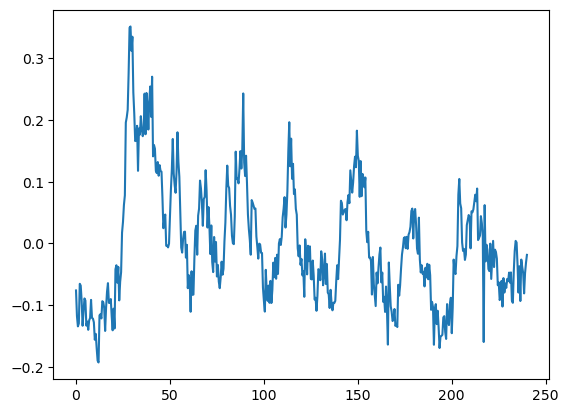

In [12]:
#⌨️⬇️
i=27
plt.plot(brain_times,dff[i])
plt.show()

In order to access all fluorescence values for neuron $i$ we can write `dff[i]`, whereas to access the fluorescence value of all neurons at timepoint $j$ we have to write `dff[:,j]`

You can also make the plot nicer by setting the range and adding labels:

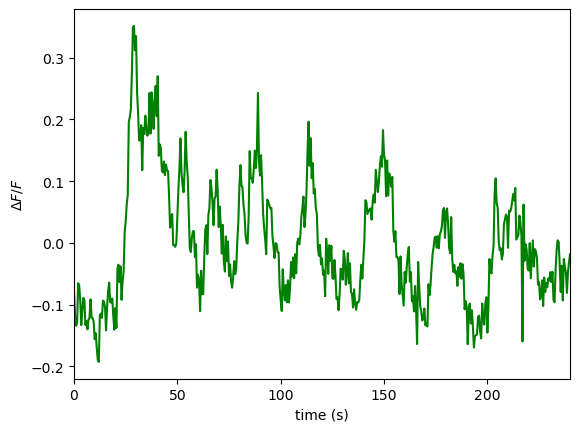

In [13]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(brain_times,dff[i],'green')
ax.set_xlabel('time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_xlim(0,brain_times[-1])
plt.show()

Note that we can use negative indices to access the elements counting from the end. `brain_times[-1]` is the last timepoint in the array.

You can run the following cell to install ipympl and make the plots interactive with the command `%matplotlib widget`:

In [14]:
#!pip install ipympl
#from google.colab import output
#output.enable_custom_widget_manager()

In [15]:
%matplotlib widget

Try plotting the fluorescence trace once again, now you can zoom in and move around by selecting the buttons on the top left:

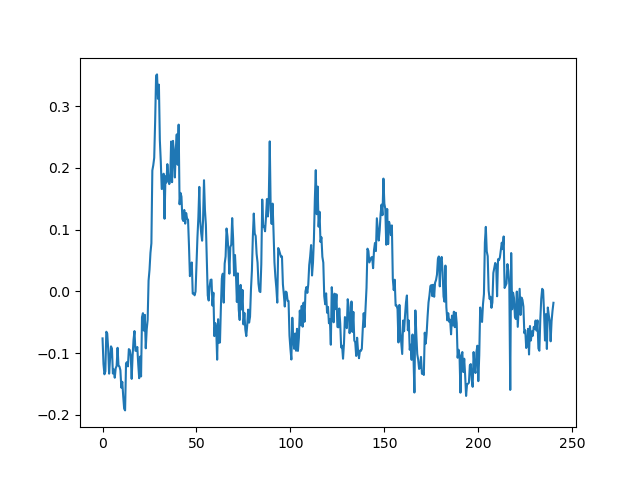

In [16]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(brain_times,dff[i])
plt.show()

To go back to the noninteractive mode you can run `%matplotlib inline`:

In [17]:
%matplotlib inline

Now try plotting the activity of the first 50 neurons by using a `for` loop:

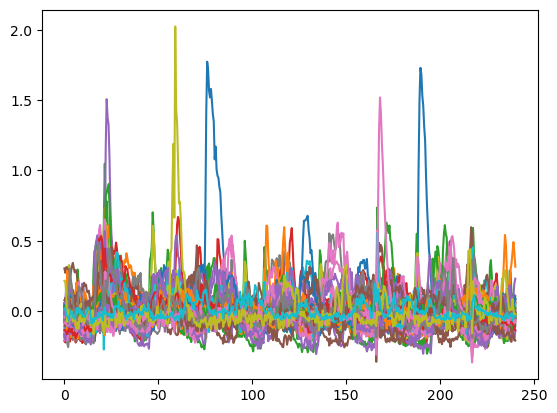

In [18]:
#⌨️⬇️
fig,ax=plt.subplots()
for i in range(50):
    ax.plot(brain_times,dff[i])
plt.show()

Things get crowded pretty quickly!

We can have a look at some summary statistics of the neural activity, for example the average activity across all neurons and its dispersion for each timepoints.  To do so it will be useful to use the library numpy, which allows for fast array operation.

In [19]:
import numpy as np #let's make it shorter as we're going to use it quite often

You should have a look at the functions `np.mean` and `np.std`:

In [20]:
#⌨️⬇️
dff_mean=np.mean(dff,axis=0)
dff_std=np.std(dff,axis=0)

Now you can use the function `plt.fill_between` to color the region closer than one standard deviation to the mean:

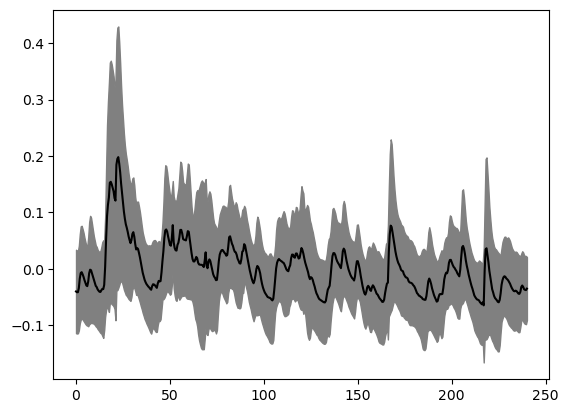

In [21]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.fill_between(brain_times,dff_mean-dff_std,dff_mean+dff_std,color='gray')
ax.plot(brain_times,dff_mean,color='black')
plt.show()

### Neuron positions:

In our dataset we also have the positions of the neurons, let's import them and have a look at their shape:

In [22]:
#⌨️⬇️
coords=file['brain/coordinates'][:]
coords.shape

(3, 30971)

For each neuron we have the three cartesian coordinates $(x,y,z)$ in micrometers.  Try to print the coordinates of a neuron at random, in order to select a random index you can use the function `np.random.randint`:

In [23]:
#⌨️⬇️
n_neurons=len(dff) #total number of neurons
random_i=np.random.randint(n_neurons) #a ranodm integer between 0 and n_neurons-1
print(f'The coordinates of neuron {random_i} are: {coords[:,random_i]}')

The coordinates of neuron 9991 are: [ 311.2  172.  -100. ]


Now let's plot all neurons positions, they're point in 3D but we can project them on a plane in order to display them in 2D.  For example plotting the $(x,y)$ coordinates is equivalent to projecting the points on the $z=0$ plane.  Try it using the function `plt.scatter`:

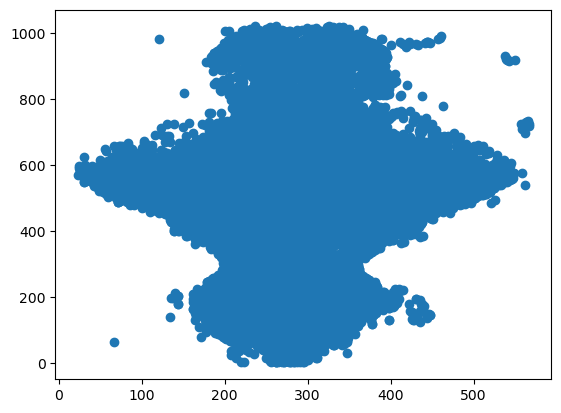

In [24]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.scatter(coords[0],coords[1])
plt.show()

It doesn't look great... We have to set the scale of the $x$ and $y$ axis to be equal, and we can also tune some parameters to change the size and transparency of the points:

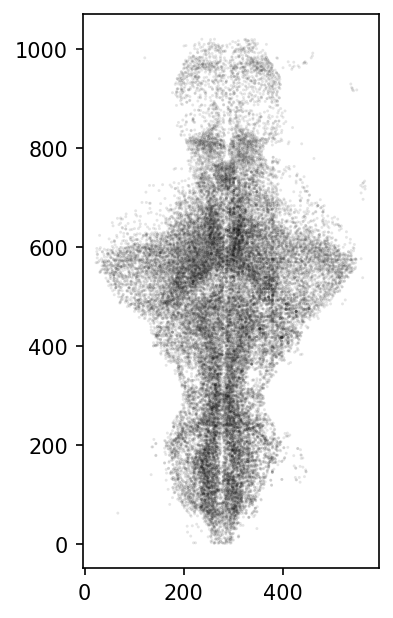

In [25]:
#⌨️⬇️
fig,ax=plt.subplots(dpi=150) #increase the resolution of the figure
ax.scatter(coords[0],coords[1],s=2,c='black',alpha=0.1,edgecolors='none') #we also change edgecolors to avoid drawing the border of the circles
ax.set_aspect('equal') #use the same scale for the two axis
plt.show()

It's way better, this is what the brain looks as like seen from above.  The fish head is oriented in the positive $y$ direction, its eyes would approximately be on the two sides of the brain at $y\simeq 800$ μm and its spinal cord would start around $y\simeq 0$ μm and extend in the negative $y$ direction, but we didn't record it in this experiment.

Let's permanently increase the resolution of the figures by changing the default parameter:

In [26]:
plt.rcParams['figure.dpi']=150

Now let's try to plot the neuron positions in the $yz$- and in the $xz$-planes as well.  You can plot all three projections in one figure by creating multiple subplots with`plt.subplots`:

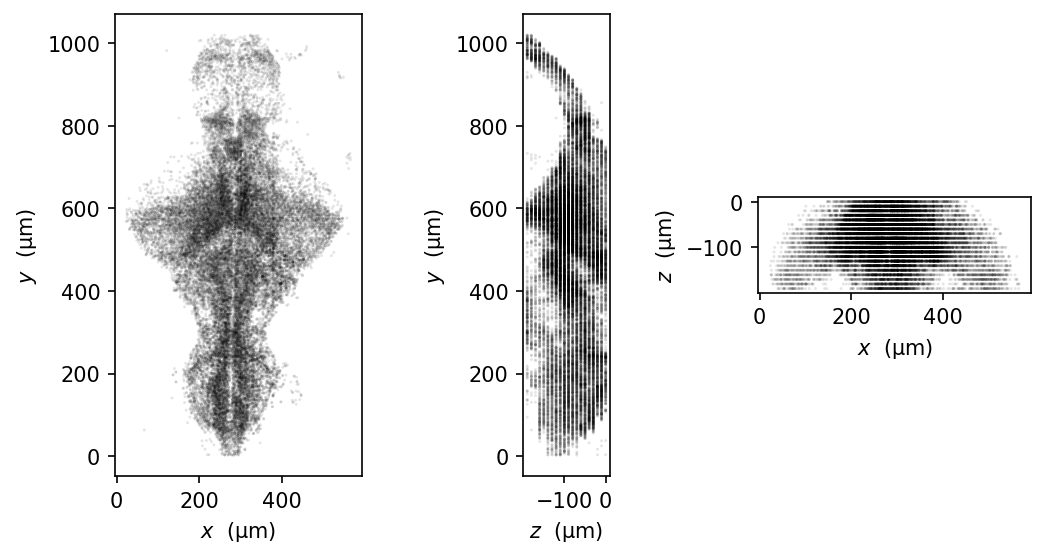

In [27]:
#⌨️⬇️
fig,axs=plt.subplots(1,3,figsize=(8,4))
axs[0].scatter(coords[0],coords[1],s=2,c='black',alpha=0.1,edgecolors='none')
axs[0].set_aspect('equal')
axs[0].set_xlabel('$x$  (μm)')
axs[0].set_ylabel('$y$  (μm)')

axs[1].scatter(coords[2],coords[1],s=2,c='black',alpha=0.1,edgecolors='none')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$z$  (μm)')
axs[1].set_ylabel('$y$  (μm)')

axs[2].scatter(coords[0],coords[2],s=2,c='black',alpha=0.1,edgecolors='none')
axs[2].set_aspect('equal')
axs[2].set_xlabel('$x$  (μm)')
axs[2].set_ylabel('$z$  (μm)')
plt.show()

Not bad, but we can make it simpler by using a custom class called `OrthoAxes`:

In [28]:
from Helper_Functions.OrthoViewer import OrthoAxes

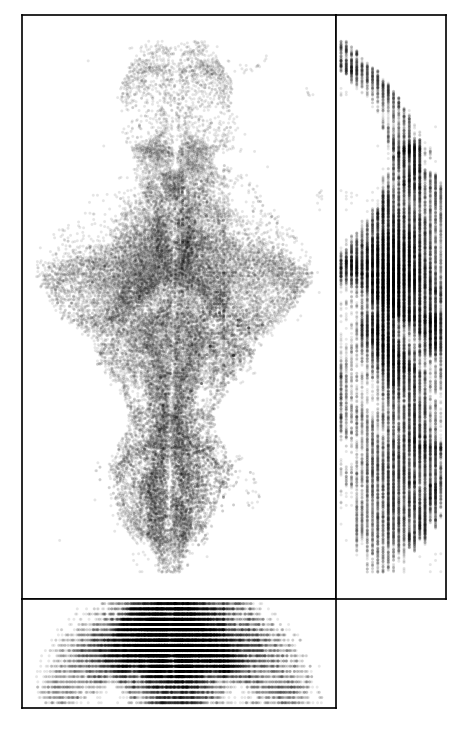

In [29]:
fig=plt.figure(figsize=(6,6))
ortho=OrthoAxes(fig,coords,interactive=False)
ortho.scatter(coords,s=2,c='k',alpha=0.1)
plt.show()

By activating interactive plots we can even select points with our cursor and if we're close enough to the position of a neuron we get its index:

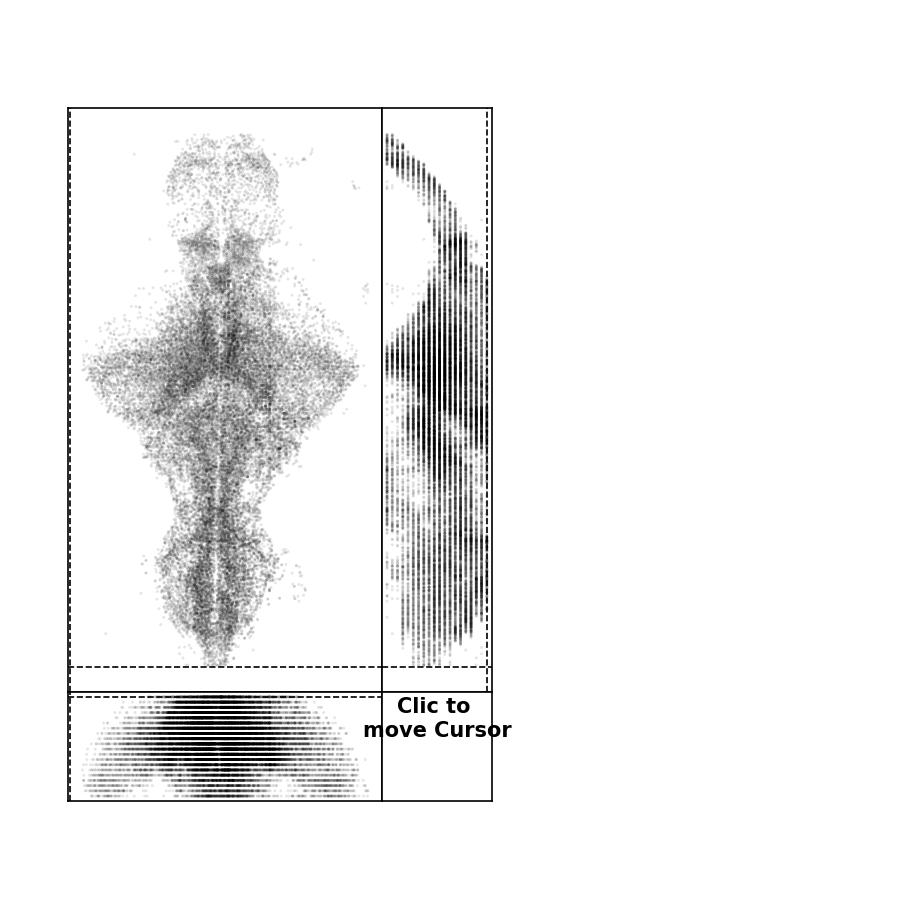

In [30]:
#⌨️⬇️
%matplotlib widget
fig=plt.figure(figsize=(6,6))
ortho=OrthoAxes(fig,coords,interactive=True)
ortho.scatter(coords,s=2,c='k',alpha=0.1)
plt.show()

Another useful way to visualize points is to use 3D plotting, you can use `fig.add_subplot(projection='3d')` to create a 3D plot.  Then you can click and drag with your cursor to rotate the view:

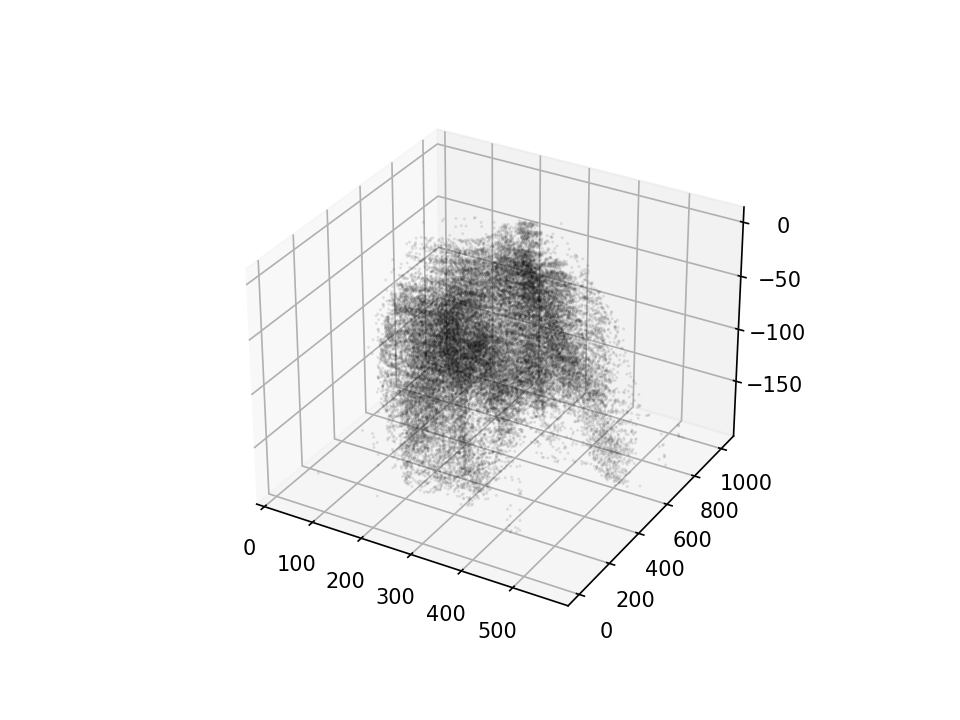

In [31]:
#⌨️⬇️
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(coords[0],coords[1],coords[2],s=2,c='k',alpha=0.1,edgecolors='none')
#ax.set_aspect('equal')
plt.show()

In [32]:
%matplotlib inline

### Strength of neural activity variations:

Now let's look at the standard deviation of the activity of each neuron over time, a measure of how strongly the activity varies along the experiment:

In [33]:
#⌨️⬇️
neuron_std=np.std(dff,axis=1)

Find the neuron with the the largest standard deviation (you can use `np.argmax`) and plot its activity over time and its position in the brain:

In [34]:
#⌨️⬇️
i_max_std=np.argmax(neuron_std)

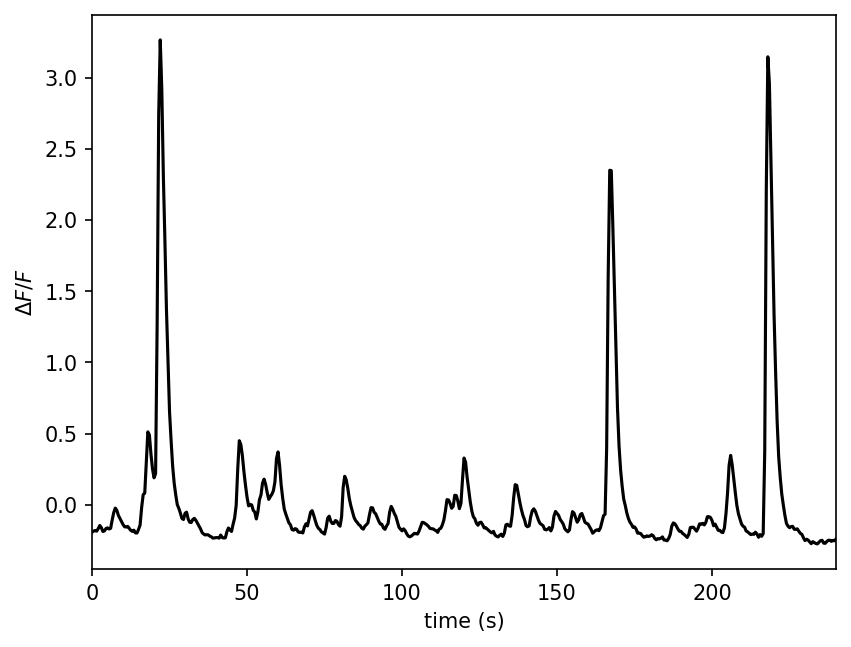

In [35]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(brain_times,dff[i_max_std],'k')
ax.set_xlabel('time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_xlim(0,brain_times[-1])
plt.show()

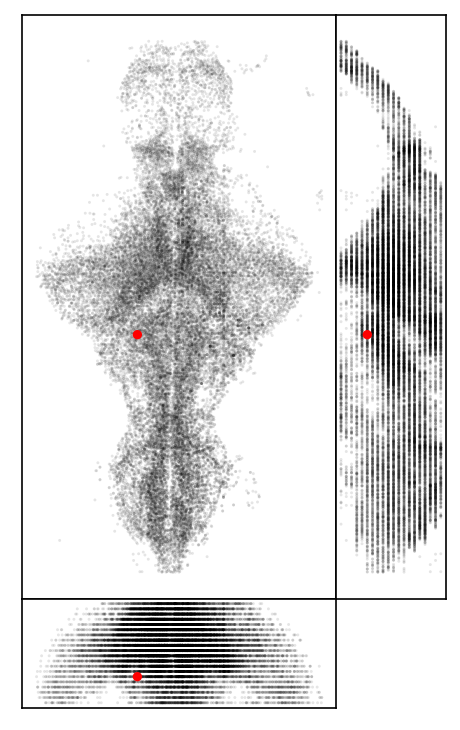

In [36]:
#⌨️⬇️
fig=plt.figure(figsize=(6,6))
ortho=OrthoAxes(fig,coords,interactive=False)
ortho.scatter(coords,s=2,c='k',alpha=0.1)
ortho.scatter(coords[:,i_max_std],s=20,c='r')
plt.show()

Well done, now let's have a look at the distribution of standard deviations across all neurons using `plt.hist`:

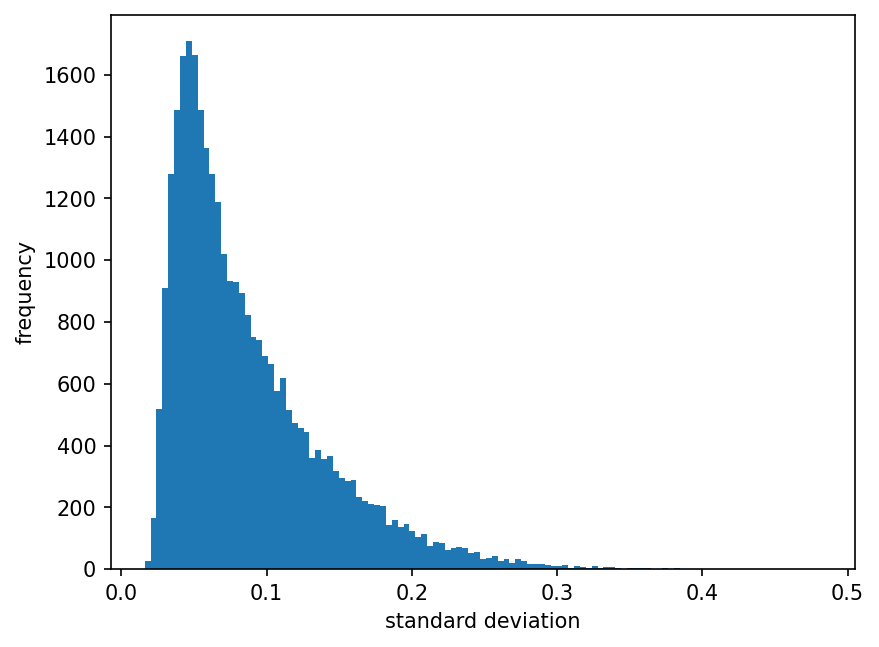

In [37]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.hist(neuron_std,bins='auto')
ax.set_xlabel('standard deviation')
ax.set_ylabel('frequency')
plt.show()

We can plot the neuron position with different opacities according to their standard deviation by passing an array to the parameter `alpha`:

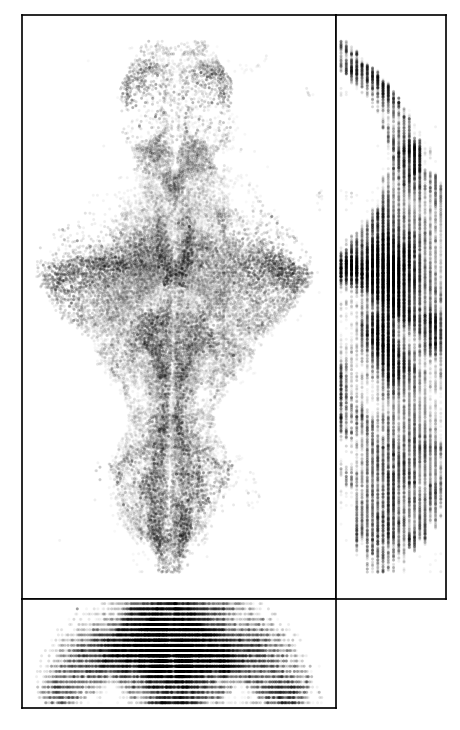

In [38]:
#⌨️⬇️
fig=plt.figure(figsize=(6,6))
ortho=OrthoAxes(fig,coords,interactive=False)
ortho.scatter(coords,s=2,c='k',alpha=neuron_std)
plt.show()

Things are not very clear because a lot of points have an intermediate transparency value.  We can rescale the array of standard deviation linearly so that the average standard deviation maps to zero and the maximum one to one.  Then we have to crop this array to positive values as `alpha` values need to be in the range $[0,1]$:

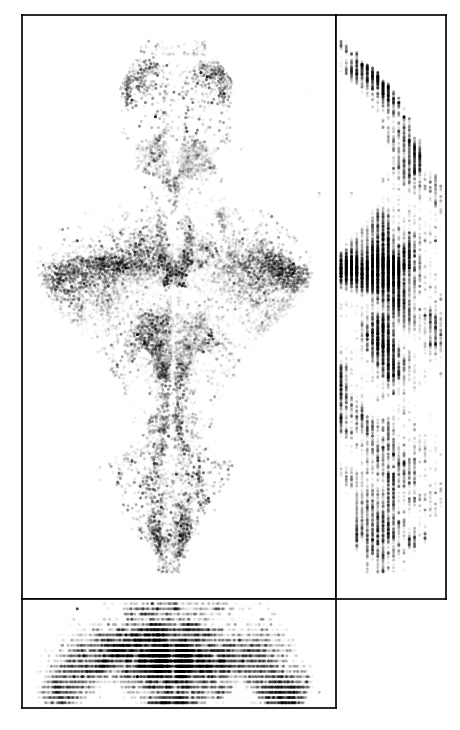

In [39]:
#⌨️⬇️
min_alpha=0
max_alpha=1
alpha=min_alpha+(neuron_std-neuron_std.mean())/(neuron_std.max()-neuron_std.mean())*(max_alpha-min_alpha)
alpha[alpha<min_alpha]=min_alpha

fig=plt.figure(figsize=(6,6))
ortho=OrthoAxes(fig,coords,interactive=False)
ortho.scatter(coords,s=2,c='k',alpha=alpha)
plt.show()

It's easier to distinguish regions where neurons have large activity variations.

Now, let's plot the fluorescence traces for the 10 neurons with the largest standard deviation. We can make use of array slicing: to select the elements $i$ to $j-1$ of `array` you can write `array[i:j]`.  Moreover, you can use the function `np.argsort` to get the neuron indices sorted by increasing standard deviation:

In [40]:
#⌨️⬇️
sorted_indices=np.argsort(-neuron_std)
selected_indices=sorted_indices[:10]

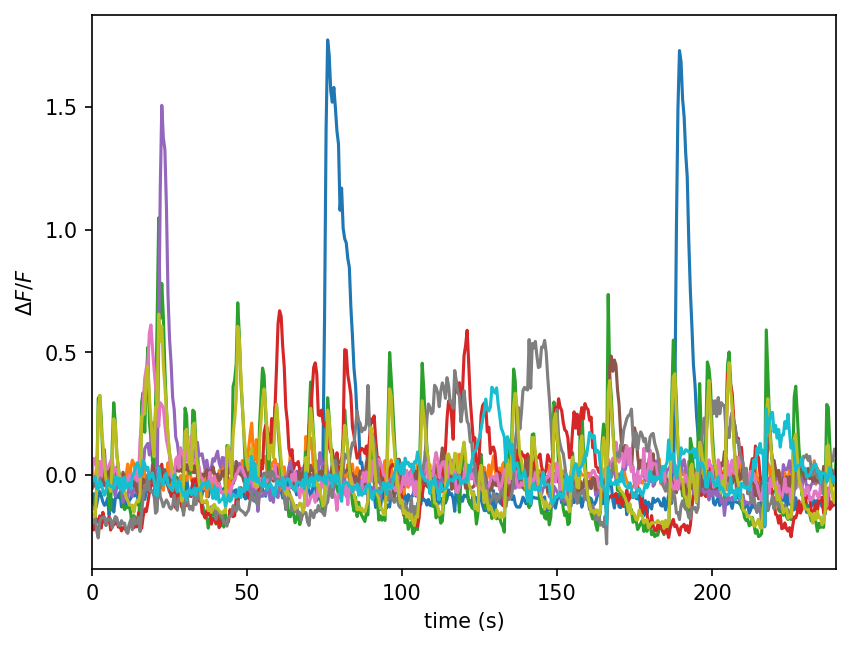

In [41]:
#⌨️⬇️
fig,ax=plt.subplots()
for i in range(len(selected_indices)):
    ax.plot(brain_times,dff[i])
ax.set_xlabel('time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_xlim(0,brain_times[-1])
plt.show()

It's still hard to distinguish different traces, we can fix this in a couple of ways.
One is to simply add an offset for each neuron to separate them:

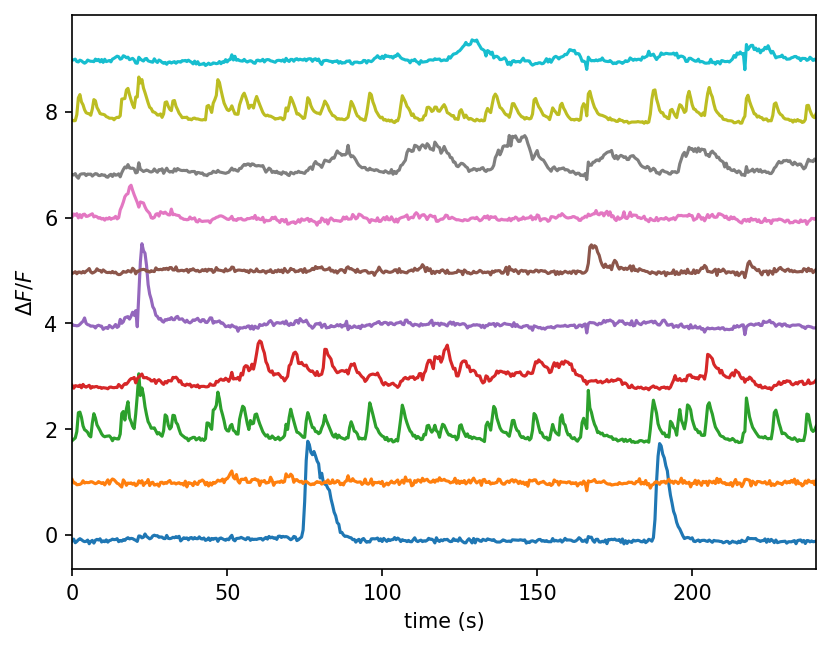

In [42]:
#⌨️⬇️
fig,ax=plt.subplots()
for i in range(len(selected_indices)):
    ax.plot(brain_times,dff[i]+i)
ax.set_xlabel('time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_xlim(0,brain_times[-1])
plt.show()

This will work if the number of traces is relatively small.  

Another way is to use a raster plot: we can visualized an image where each pixel encodes the activity of a certain neuron at a certain timepoint, different rows correspond to different neurons whereas different columns correspond to different timepoints.  Try to do this by using the function `plt.imshow` which displays a 2D array as an image.  You'll probably have to change the `aspect` and `interpolation` parameters.

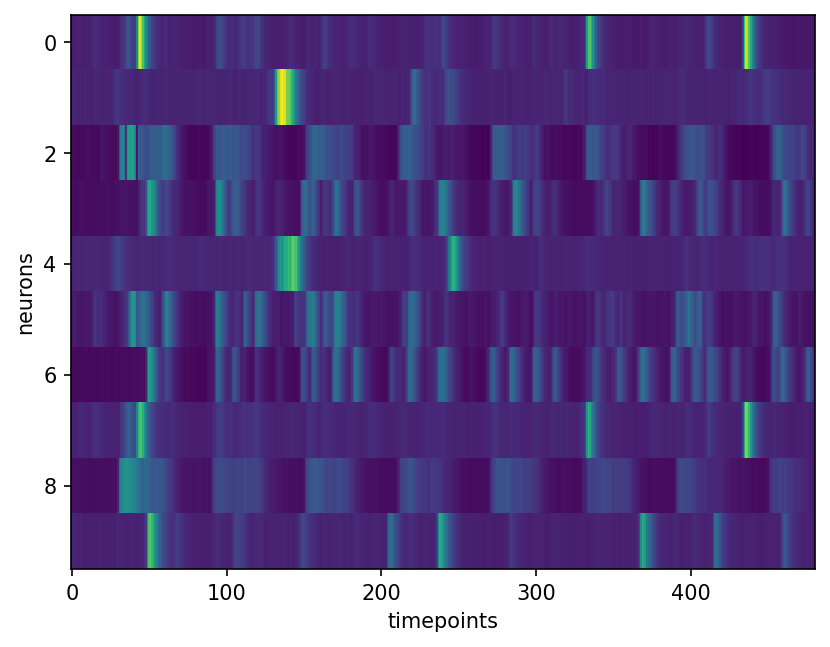

In [43]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.imshow(dff[selected_indices],aspect='auto',interpolation='none')
ax.set_xlabel('timepoints')
ax.set_ylabel('neurons')
plt.show()

Now try to add a colorbar to understand the values corresponding to the pixel colors with `plt.colorbar` and optionally change the range of the axis so that the timescale is in seconds rather than timepoints:

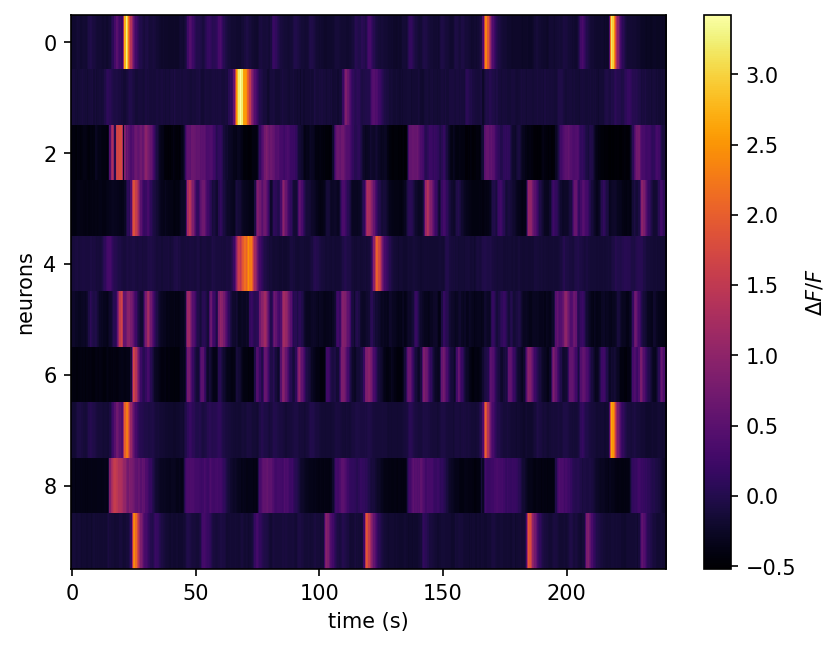

In [44]:
#⌨️⬇️
fig,ax=plt.subplots()
dt=np.mean(np.diff(brain_times))
extent=[brain_times[0]-dt/2,brain_times[-1]+dt/2,len(selected_indices)-0.5,-0.5]
im=ax.imshow(dff[selected_indices],cmap='inferno',aspect='auto',interpolation='none',extent=extent)
cbar=plt.colorbar(im)
cbar.set_label('$\Delta F/F$')
ax.set_xlabel('time (s)')
ax.set_ylabel('neurons')
plt.show()

Another way to visualize multiple traces is to do it interactively with a slider.  Here you have one possible implementation: we define a function which takes a number as input and plots a corresponding trace and we add a decorator to interact with it by using a slider to select its input.

In [45]:
from ipywidgets import interact

In [46]:
@interact(neuron=(0,len(selected_indices)-1))
def plot_dff_trace(neuron=0):
    plt.close()
    fig,ax=plt.subplots()
    ax.plot(brain_times,dff[selected_indices[neuron]],'k')
    ax.set_xlim(brain_times[0],brain_times[-1])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('$\Delta F/F$')
    plt.show()

interactive(children=(IntSlider(value=0, description='neuron', max=9), Output()), _dom_classes=('widget-intera…

### Stimulus:

Now let's import the stimulus speed and plot it over time:

In [47]:
#⌨️⬇️
stimulus_speed=file['stimulus/speed'][:]
stimulus_times=file['stimulus/times'][:]

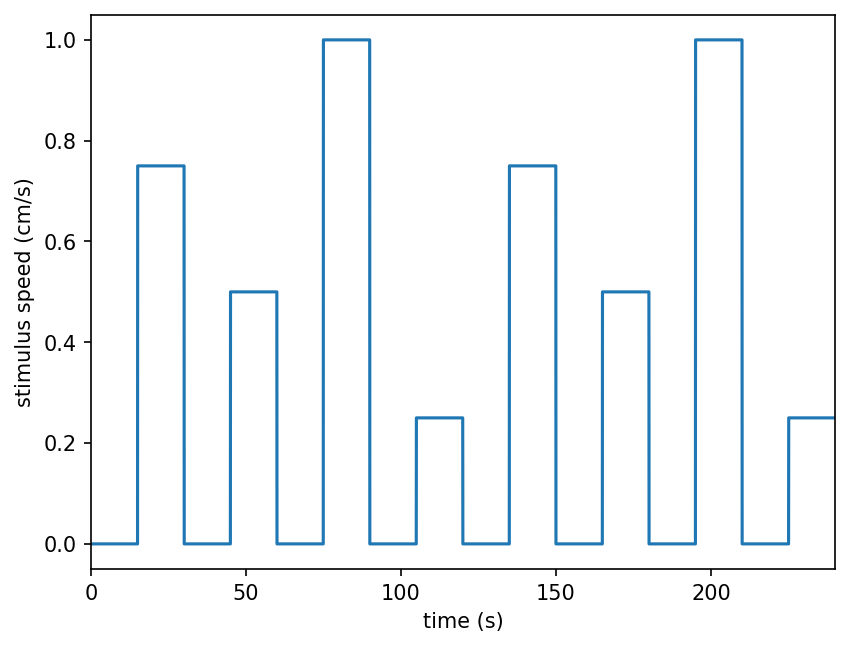

In [48]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(stimulus_times,stimulus_speed)
ax.set_xlabel('time (s)')
ax.set_ylabel('stimulus speed (cm/s)')
ax.set_xlim(0,brain_times[-1])
plt.show()

The experiment is composed by 8 trials where the visual stimulus moving forward with different speeds.  This visual motion induces swimming in the fish, this behavior is known as optomotor response.

Do you notice any similarity between the stimulus structure and the activity of certain neurons?

Try plotting them together in the same figure:

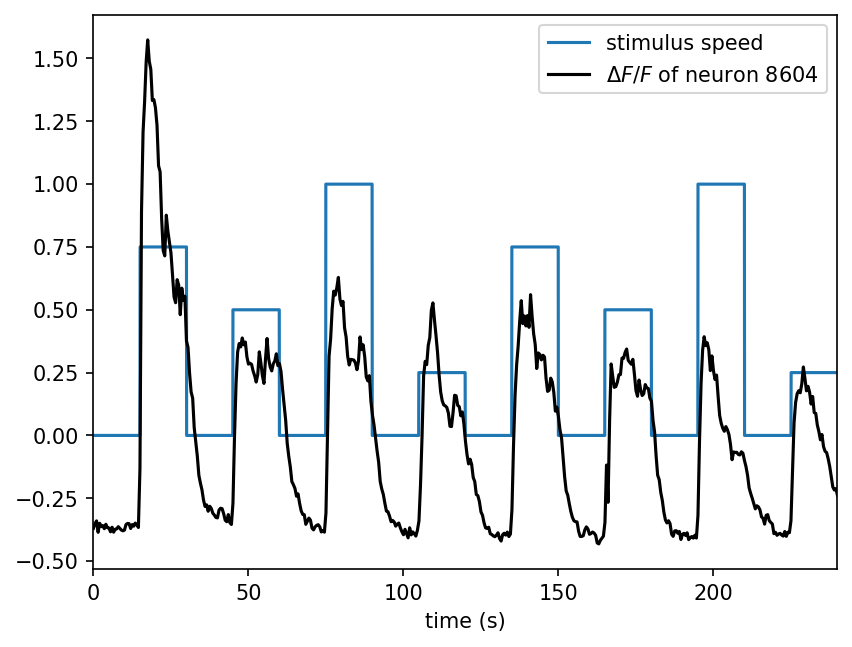

In [49]:
#⌨️⬇️
i=selected_indices[8]
fig,ax=plt.subplots()
ax.plot(stimulus_times,stimulus_speed,label='stimulus speed')
ax.plot(brain_times,dff[i],'k',label=f'$\Delta F/F$ of neuron {i}')
ax.set_xlabel('time (s)')
ax.set_xlim(0,brain_times[-1])
ax.legend()
plt.show()

What do you think is the function of these neurons?

We can also plot the direction of the stimulus over time:

In [50]:
#⌨️⬇️
stimulus_direction=file['stimulus/direction'][:]

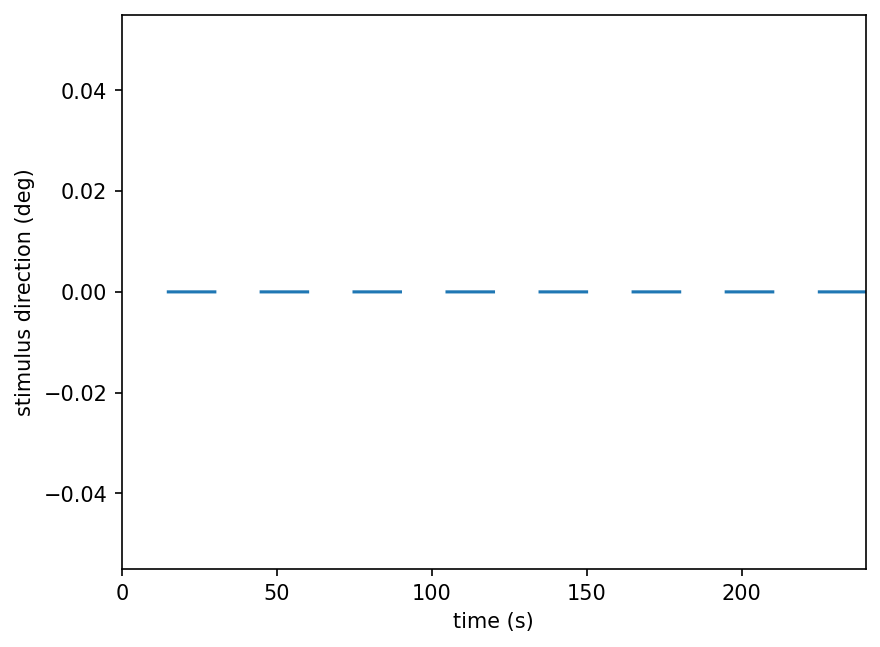

In [51]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(stimulus_times,stimulus_direction)
ax.set_xlabel('time (s)')
ax.set_ylabel('stimulus direction (deg)')
ax.set_xlim(0,brain_times[-1])
plt.show()

As you can see the direction of visual motion is 0 for all trials, corresponding to forward motion.
When the speed is zero then the direction is not defined, for those timepoints the array contains `nan`, a particular value used to indicate undefined entries (Not a Number).

In [52]:
stimulus_direction[0]

nan

### Behavior:

As we said before we recorded images of the tail as well during the experiment, these images were segmented to extract the position of some points along the tail, we can import them as look at their shape:

In [53]:
#⌨️⬇️
tail_coords=file['tail/coordinates'][:]
tail_coords.shape

(36107, 11, 2)

It's a 3D array: the first index selects the timepoint, the second one the segmented point along the tail, the third one its $x$ or $y$ coordinate.

You can try to define a function that plots the points along the tail for a given timepoint and make it interactive with a slider:

In [146]:
#⌨️⬇️
@interact(i=(0,len(tail_coords)-1))
def plot_tail(i=0):
    plt.close()
    fig,ax=plt.subplots()
    ax.plot(tail_coords[i,:,0],tail_coords[i,:,1],'.-k') #we used a format string to get black points connected by a solid line 
    ax.set_xlim(0,55)
    ax.set_ylim(-30,30)
    ax.set_aspect('equal')
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=36106), Output()), _dom_classes=('widget-interac…

From these points we have extracted the angle of the tip of the tail with respect to the body axis, it's contained in `tail/deflection`.  If you feel like it you can try to extract it yourself from the coordinates of the tail.  Let's have a look at it as a function of time:

In [55]:
#⌨️⬇️
deflection=file['tail/deflection'][:]
tail_times=file['tail/times'][:]

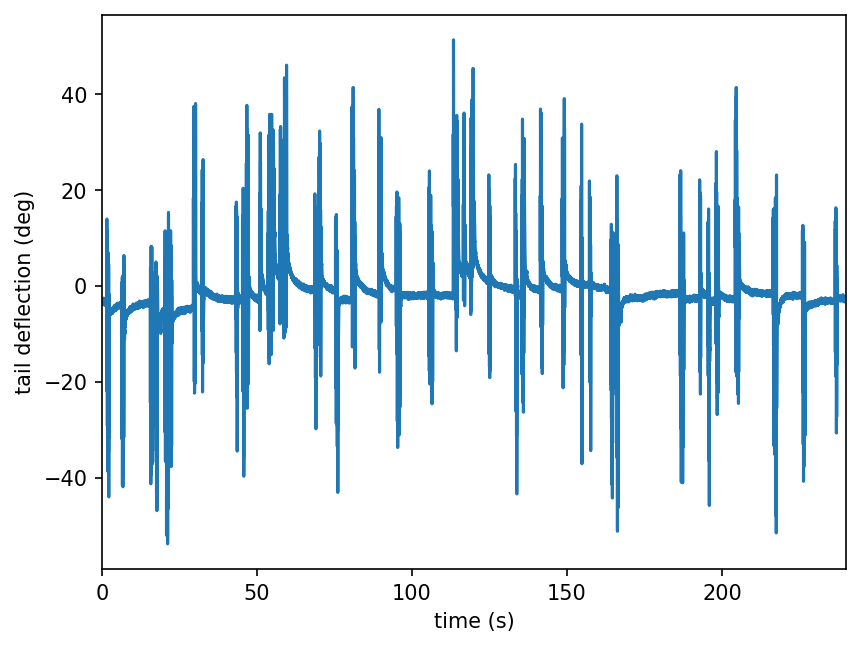

In [56]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.plot(tail_times,deflection)
ax.set_xlabel('time (s)')
ax.set_ylabel('tail deflection (deg)')
ax.set_xlim(0,brain_times[-1])
plt.show()

It's not so easy to see what's going on, let's try to zoom in.  You can either make the plot interactive or reduce the limits on the $x$ axis: 

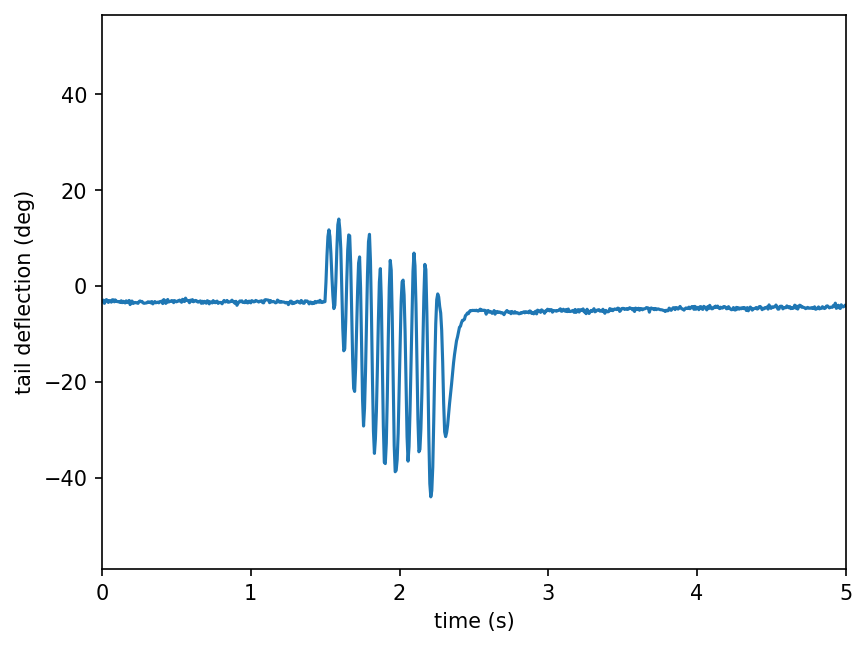

In [57]:
#⌨️⬇️
t1=0
t2=5
fig,ax=plt.subplots()
ax.plot(tail_times,deflection)
ax.set_xlabel('time (s)')
ax.set_ylabel('tail deflection (deg)')
ax.set_xlim(t1,t2)
plt.show()

At this scale we can better see the individual swimming events as fast oscillations of the tail angle over time.

The array in `tail/forward_thrust` contains an estimate of the swimming strength over time, let's plot it together with the tail deflection:

In [58]:
#⌨️⬇️
forward_thrust=file['tail/forward_thrust'][:]

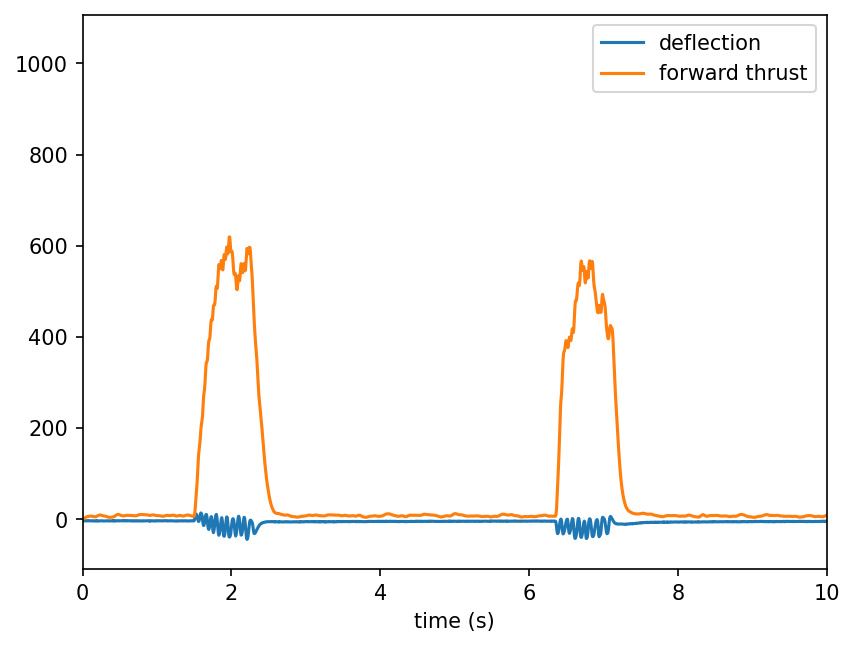

In [59]:
#⌨️⬇️
t1=0
t2=10
fig,ax=plt.subplots()
ax.plot(tail_times,deflection,label='deflection')
ax.plot(tail_times,forward_thrust,label='forward thrust')
ax.set_xlabel('time (s)')
ax.set_xlim(t1,t2)
ax.legend()
plt.show()

The two signals have very different amplitudes, to make it easier to compare them we can normalize them by subtracting their mean and rescaling them by their standard deviation.  You can do it easily with the function `scale` from sklearn: 

In [60]:
from sklearn.preprocessing import scale

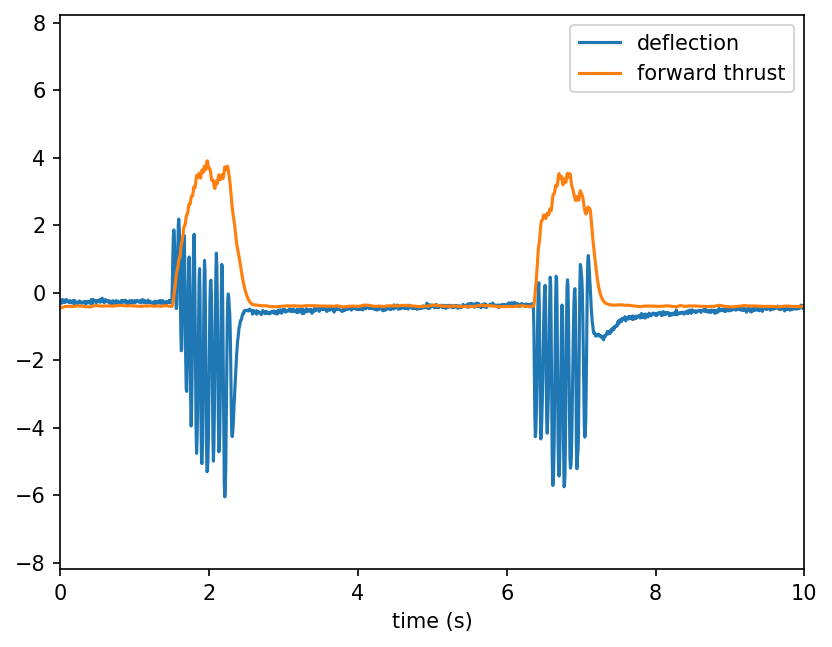

In [61]:
#⌨️⬇️
t1=0
t2=10
fig,ax=plt.subplots()
ax.plot(tail_times,scale(deflection),label='deflection')
ax.plot(tail_times,scale(forward_thrust),label='forward thrust')
ax.set_xlabel('time (s)')
ax.set_xlim(t1,t2)
ax.legend()
plt.show()

Now try to find a neuron whose activity is related to the swimming strength:

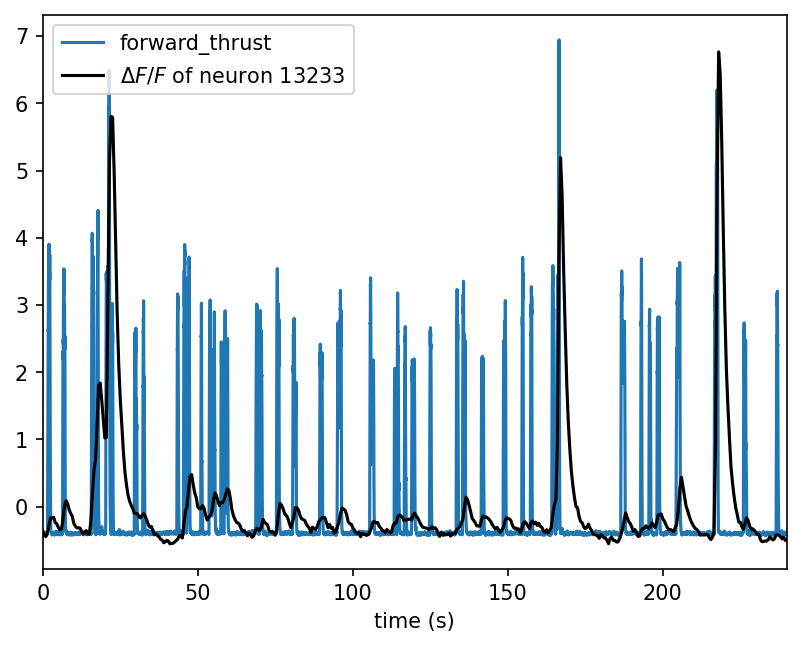

In [62]:
#⌨️⬇️
i=selected_indices[7]
t1=0
t2=brain_times[-1]
fig,ax=plt.subplots()
ax.plot(tail_times,scale(forward_thrust),label='forward_thrust')
ax.plot(brain_times,scale(dff[i]),'k',label=f'$\Delta F/F$ of neuron {i}')
ax.set_xlabel('time (s)')
ax.set_xlim(t1,t2)
ax.legend()
plt.show()

What do you think is the role of this neuron?

We've explored this dataset in quite some depth, now we'll move on to a different one.  If you have some extra time you're welcome to explore more by yourself and visualize other possible quantities of interested.

## Free swimming trajectories:

Now let's look at the data from another experiment where larval zebrafish were recorded while swimming in shallow water at different temperatures.

First close the file of the first dataset, then open the file `behaviour_free_swimming.h5` and display its content:

In [67]:
#⌨️⬇️
file.close()
file=h5py.File('content/behaviour_free_swimming.h5','r')
h5tree_view(file)

. content/behaviour_free_swimming.h5
├── 📁behaviour
│   ├── 🏷️framerate = `24.935128768196524`
│   └── 🏷️source = `https://bmcbiol.biomedcentral.com/articles/10.1186/s12915-021-01126-w`
│   ├── 📁18
│   │   └── 🏷️temperature = `18°C`
│   │   ├── 🔢bouttime ⚙️(532, 642)float64
│   │   │   └── 🏷️unit = `s`
│   │   ├── 🔢displacements ⚙️(532, 641)float64
│   │   │   └── 🏷️unit = `mm`
│   │   ├── 🔢dtheta ⚙️(532, 641)float64
│   │   │   └── 🏷️unit = `degree`
│   │   ├── 🔢interboutintervals ⚙️(532, 641)float64
│   │   │   └── 🏷️unit = `s`
│   │   ├── 🔢xpos ⚙️(532, 642)float64
│   │   │   └── 🏷️unit = `mm`
│   │   ├── 🔢ypos ⚙️(532, 642)float64
│   │   │   └── 🏷️unit = `mm`
│   ├── 📁22
│   │   └── 🏷️temperature = `22°C`
│   │   ├── 🔢bouttime ⚙️(1329, 749)float64
│   │   │   └── 🏷️unit = `s`
│   │   ├── 🔢displacements ⚙️(1329, 748)float64
│   │   │   └── 🏷️unit = `mm`
│   │   ├── 🔢dtheta ⚙️(1329, 748)float64
│   │   │   └── 🏷️unit = `degree`
│   │   ├── 🔢interboutintervals ⚙️(1329, 748)float64
│  

Zebrafish larvae swim with a series of discrete movements called bouts, in this dataset we have the coordinates of the fish before bouts and the corresponding times.

Let's import the $(x,y)$ coordinates and bout times for the experiments at 26°C:

In [126]:
#⌨️⬇️
xs=file['behaviour/26/xpos'][:]
ys=file['behaviour/26/ypos'][:]
ts=file['behaviour/26/bouttime'][:]

These arrays contain the times and coordinates of various fish for 1513 different trajectories and maximum of 433 timepoints.

Different trajectories can have a different number of bouts, only the longest one has 433 bouts, for the other ones the array is filled with NaNs, let's print the bout times of the first trajectory and see it for ourselves:

In [127]:
#⌨️⬇️
ts[0]

array([ 3.84999014,  4.49165517,  5.89529741,  6.61717056,  7.09841933,
       13.71558989, 14.35725491, 14.91871181, 15.35985651, 16.16193779,
       16.84370688, 18.28745318, 19.81140761, 20.65359296, 21.25515392,
       22.0572352 , 22.53848397, 23.34056525, 24.86451968, 25.34576845,
       26.22805785, 27.35097165, 27.79211635, 29.23586265, 33.96814221,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

We can count the number of bouts in each trajectory by using the function `np.isnan` which checks whether an element is a NaN.  Try doing it for the first trajectory:

In [135]:
#⌨️⬇️
(~np.isnan(ts[0])).sum() #we used the complement operator ~ to invert True and False, alternatively: len(ts[0])-np.isnan(ts[0]).sum()

25

Let's do it for all trajectories and plot a histogram to visualize the result:

In [136]:
#⌨️⬇️
n_bouts=np.zeros(len(ts))
for i in range(len(ts)):
    n_bouts[i]=(~np.isnan(ts[i])).sum()

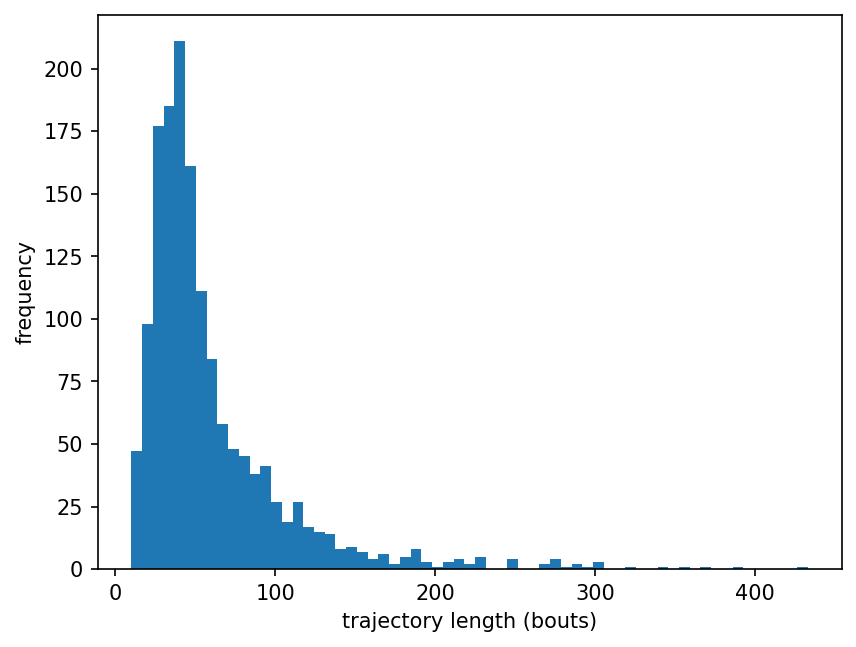

In [141]:
#⌨️⬇️
fig,ax=plt.subplots()
ax.hist(n_bouts,bins='auto')
ax.set_xlabel('trajectory length (bouts)')
ax.set_ylabel('frequency')
plt.show()

Now let's plot a single trajectory in the $xy$-plane:

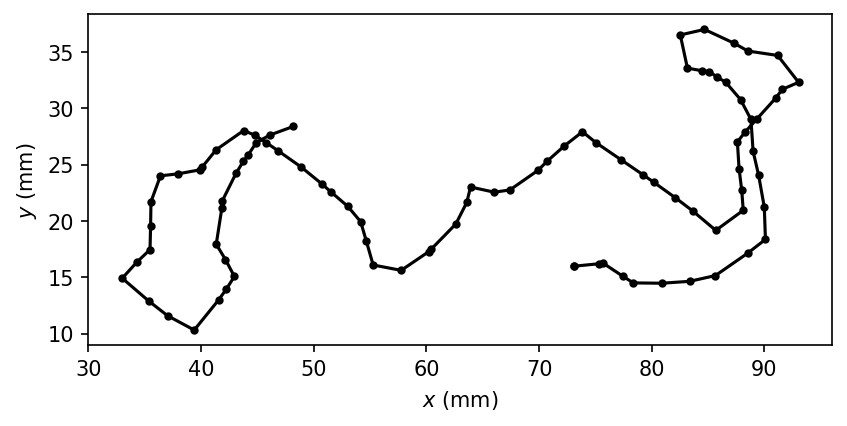

In [162]:
#⌨️⬇️
i=30
fig,ax=plt.subplots()
ax.plot(xs[i],ys[i],'.-k')
ax.set_aspect('equal')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
plt.show()